# Participant Demographics and Fitness Analysis
### This file does the following
- identifies all participants who finished the baseline breath hold fmri task
- categorizes them based on relative vo2 (fitness)
- Analyzes the distribution of fitness

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
base_data = pd.read_csv('../../data/data_demogs_ExtendBaseline_n122.csv')
base_data.head()

,subID,age,sex,race_black,race_caucasian,race_asian,race_nathaw,race_amindna,race_multi,ethnicity,...,day1postrun1fmriprep,day1postrun2fmriprep,day1postrun3fmriprep,day2prerun1fmriprep,day2prerun2fmriprep,day2prerun3fmriprep,day2postrun1fmriprep,day2postrun2fmriprep,day2postrun3fmriprep,MR.Sessions
0,2002,73,Female,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino,...,True,True,True,True,True,True,True,True,True,5
1,2020,71,Female,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino,...,True,True,True,True,True,True,True,True,True,5
2,2041,71,Female,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,...,True,True,True,True,True,True,True,True,True,5
3,2042,56,Female,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino,...,True,True,True,True,True,True,True,True,True,5
4,2053,59,Male,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,...,True,True,True,True,True,True,True,True,True,5


In [4]:
breathhold = base_data[base_data['breathhold'] == True]
#if group is not na
breathhold = breathhold[breathhold['Group'].notna()]
len(breathhold)

116

Text(0.5, 1.0, 'Distribution of vo2rel')

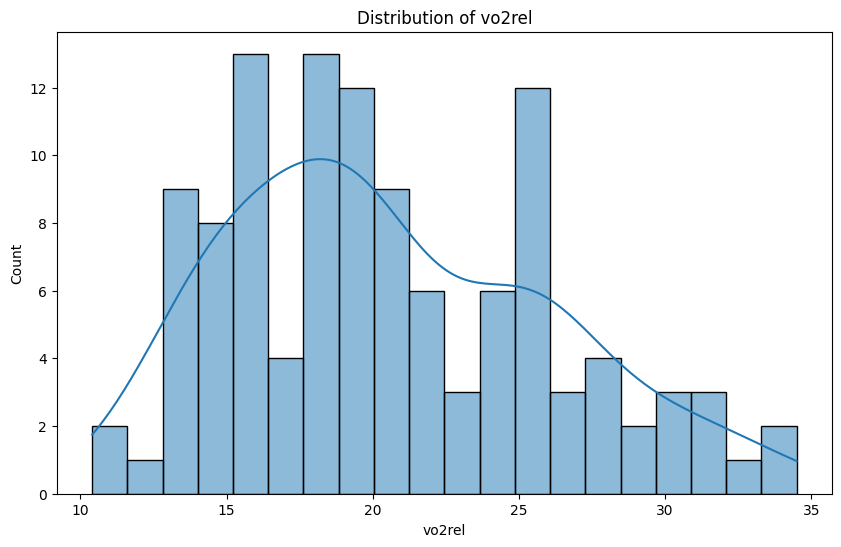

In [5]:
# plot distribution of 'vo2rel'
plt.figure(figsize=(10, 6))
sns.histplot(breathhold['vo2rel'], bins=20, kde=True)
plt.title('Distribution of vo2rel')


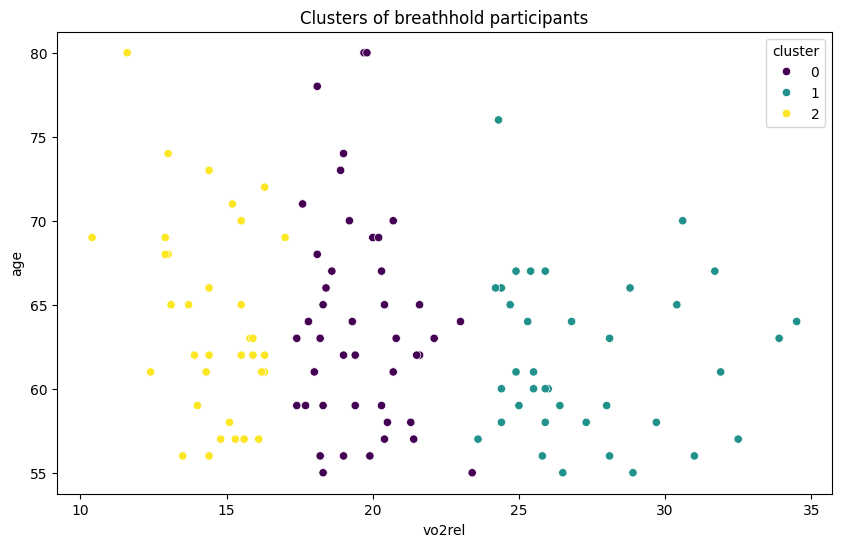

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = breathhold[['vo2rel']]
X_scaled = scaler.fit_transform(X)

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=35)
kmeans.fit(X_scaled)

breathhold_clusters = breathhold.copy()
breathhold_clusters['cluster'] = kmeans.labels_

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=breathhold_clusters, x='vo2rel', y='age', hue='cluster', palette='viridis')
plt.title('Clusters of breathhold participants')
plt.show()


In [9]:
# export a csv files with cluster label and vo2rel by subject
final = breathhold_clusters[['subID', 'cluster', 'vo2rel', 'Group']]
final.to_csv('../../data/breathhold_clusters.csv', index=False)

In [8]:
final.head()

,subID,cluster,vo2rel,Group
0,2002,2,14.4,A
1,2020,2,15.2,P
2,2041,0,17.6,P
3,2042,2,13.5,A
4,2053,1,25.0,A
